‰∏ÄÂÄãÂâç„ÅÆÂ•¥„ÇíÊèêÂá∫„Åó„Åü„ÇâNumberChildrenÂàó„ÅÆÂâçÂá¶ÁêÜÊîπÂñÑ„ÇíÂèçÊò†


Â§âÊï∞„Çí‰∏ÄÂÄã„Åö„Å§Ê∂à„Åó„Å¶ÂâçÂá¶ÁêÜ„ÅÆÊ≠£Á¢∫ÊÄß„ÇíÁ¢∫„Åã„ÇÅ„Çã

Áõ∏Èñ¢‰øÇÊï∞„ÅåÈ´ò„ÅÑÂ§âÊï∞„ÇíÂØæÂá¶

In [9]:
# „Ç§„É≥„Çπ„Éà„Éº„É´
#!pip install kanjize

# „Ç§„É≥„Éù„Éº„Éà
import pandas as pd
import numpy as np
from kanjize import number2kanji, kanji2number
import re
import unicodedata

# Ë™≠„ÅøËæº„Åø
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# ÁµêÂêà
train_df['flg'] = -1
test_df['flg'] = -2
df = pd.concat([train_df, test_df], axis=0)





##### ÂâçÂá¶ÁêÜ #####





### AgeÂàó ###



# Ê≠≥, Êâç, Èöõ„ÇíÂâäÈô§
df['Age'] = df['Age'].str.replace('Ê≠≥', '').str.replace('Êâç', '').str.replace('Èöõ', '')


# Êó•Êú¨Ë™û„Å®Êï∞Â≠ó„ÅÆÂπ¥‰ª£Ë°®Ë®ò„ÇíÂØæÂøú„Åï„Åõ„Çã
age_mapping = {
    '10‰ª£': 15, '20‰ª£': 25, '30‰ª£': 35, '40‰ª£': 45, '50‰ª£': 55, '60‰ª£': 65,
    'ÔºëÔºê‰ª£': 15, 'ÔºíÔºê‰ª£': 25, 'ÔºìÔºê‰ª£': 35, 'ÔºîÔºê‰ª£': 45, 'ÔºïÔºê‰ª£': 55, 'ÔºñÔºê‰ª£': 65
}

# „Éû„ÉÉ„Éî„É≥„Ç∞„Çí‰Ωø„Å£„Å¶Age_group„ÇíË®≠ÂÆö„Åô„Çã
df['Age_Group_Generation'] = df['Age'].map(age_mapping)

df['Age'] = df['Age'].replace({
    '10‰ª£': -1, '20‰ª£': -2, '30‰ª£': -3, '40‰ª£': -4, '50‰ª£': -5, '60‰ª£': -6,
    'ÔºëÔºê‰ª£': -1, 'ÔºíÔºê‰ª£': -2, 'ÔºìÔºê‰ª£': -3, 'ÔºîÔºê‰ª£': -4, 'ÔºïÔºê‰ª£': -5, 'ÔºñÔºê‰ª£': -6
})


# Êº¢Êï∞Â≠ó„ÇíÊï∞Â≠ó„Å´Â§âÊèõ
# NaN„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÅÆ„ÅøÂá¶ÁêÜ„ÇíÂÆüË°å
if df['Age'].isna().any():
    # NaN„ÇíÂê´„ÇÄË°å„ÅØÈô§Â§ñ„Åõ„Åö„ÄÅ„Åù„ÅÆ„Åæ„ÅæÂá¶ÁêÜ„ÇíÁ∂ö„Åë„Çã
    df['Age'] = df['Age'].apply(lambda x: kanji2number(x) if isinstance(x, str) else x)
else:
    # NaN„ÅåÂê´„Åæ„Çå„Å¶„ÅÑ„Å™„ÅÑÂ†¥Âêà„ÄÅÈÄöÂ∏∏ÈÄö„ÇäÂá¶ÁêÜ„ÇíÂÆüË°å
    df['Age'] = df['Age'].apply(lambda x: kanji2number(x) if isinstance(x, str) else x)

# AgeÂàó„ÇífloatÂûã„Å´
df['Age'] = df['Age'].astype(float)


# NaN„Åß„Å™„ÅÑ„ÅãÁ¢∫Ë™ç„Åó„ÄÅAge_Group„Å´ÂØæÂøú
def age_group(age):
    if isinstance(age, float):
        if   10 <= age < 20:
            return '15'
        elif 20 <= age < 30:
            return '25'
        elif 30 <= age < 40:
            return '35'
        elif 40 <= age < 50:
            return '45'
        elif 50 <= age < 60:
            return '55'
        elif 60 <= age < 70:
            return '65'
        else:
          return np.nan

df['Age_Group'] = df['Age'].apply(age_group)

# Age_Group_Generation„ÅÆÂÄ§„ÇíAge_Group„Å´‰ª£ÂÖ•ÔºàNaN„ÅÆÂ†¥Âêà„ÅØ‰Ωï„ÇÇ„Åó„Å™„ÅÑÔºâ
df['Age_Group'] = np.where(df['Age_Group_Generation'].notna(), df['Age_Group_Generation'], df['Age_Group'])

# Age_GroupÂàó„ÇífloatÂûã„Å´Â§âÊõ¥
df['Age_Group'] = df['Age_Group'].astype(float)
'''
# ‰∏ñ‰ª£„ÅÆAge„Çí„ÅÇ„ÅÑ„Å†„ÅÆÂÄ§„ÅßÂüã„ÇÅ„Çã
# ÂÖÉ„ÅÆ„Éû„ÉÉ„Éî„É≥„Ç∞„ÇíÂÆöÁæ©
reverse_mapping = {
    -1: 15, -2: 25, -3: 35, -4: 45, -5: 55, -6: 65
}
'''
# ‰∏ñ‰ª£„ÅÆAge„ÇíÊ¨†ÊêçÂÄ§„Å´„Åô„Çã
reverse_mapping = {
    -1: np.nan, -2: np.nan, -3: np.nan, -4: np.nan, -5: np.nan, -6: np.nan
}
# AgeÂàó„ÅÆÂÄ§„ÇíÂèçËª¢„Éû„ÉÉ„Éî„É≥„Ç∞„ÅßÁΩÆ„ÅçÊèõ„Åà
df['Age'] = df['Age'].replace(reverse_mapping)

# Age_Group_GenerationÂàó„ÇíÂâäÈô§
df = df.drop(columns=['Age_Group_Generation'])



### TypeofContactÂàó ###



# Á©∫ÁôΩ„ÇíÂâäÈô§
df['TypeofContact'] = df['TypeofContact'].str.replace(' ', '', regex=False)

# nan„ÇíÊ¨†ÊêçÂÄ§„Å´ÁΩÆ„ÅçÊèõ„Åà„Çã
df['TypeofContact'] = df['TypeofContact'].replace('nan', np.nan)

# „ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['TypeofContact'], prefix='TypeofContact')



### DurationOfPitchÂàó ###



def convert_duration_to_seconds(duration):
    # NaN„ÅÆÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô
    if pd.isna(duration):
        return duration
    # ÂàÜ„Å®Áßí„ÅÆÂΩ¢Âºè„ÇíÂà§ÂÆö
    minutes_match = re.match(r'(\d+)ÂàÜ', duration)
    seconds_match = re.match(r'(\d+)Áßí', duration)

    if minutes_match:
        minutes = int(minutes_match.group(1))
        return minutes * 60
    elif seconds_match:
        seconds = int(seconds_match.group(1))
        return seconds
    else:
        # ‰ªñ„ÅÆÂΩ¢Âºè„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô
        return duration

# ÁßíÊï∞„Å´Â§âÊèõ
df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_duration_to_seconds)



### OccupationÂàó ###



# „ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['Occupation'])



### GenderÂàó ###



# Á©∫ÁôΩ„ÇíÂâäÈô§
df['Gender'] = df['Gender'].str.replace(' ', '', regex=False)
df['Gender'] = df['Gender'].str.replace('\u3000', '')

# Â§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
df['Gender'] = df['Gender'].str.lower()

# ÂÖ®Ëßí„ÇíÂçäËßí„Å´ÁΩÆ„ÅçÊèõ„Åà
df['Gender'] = df['Gender'].replace('ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ', 'female')
df['Gender'] = df['Gender'].replace('ÔΩçÔΩÅÔΩåÔΩÖ', 'male')

# „ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['Gender'])



### ProductPitchedÂàó ###



# Á©∫ÁôΩ„ÇíÂâäÈô§
df['ProductPitched'] = df['ProductPitched'].str.replace(' ', '', regex=False)

# Â§â„Å™ÊñáÂ≠ó„Çí„Ç∑„É≥„Éó„É´„Å™ÊñáÂ≠ó„Å´ÁΩÆÊèõ
replace_dict = {
    '·óû': 'd', '|': 'l', 'Íì¢': 's', '–≤': 'b', '√ó': 'x',
    'Œµ': 'e', 'Œ≤': 'b', 'œ≤': 'c', 'Œ±': 'a', 'ùñ∫': 'a', 'ùô≥': 'D',
    'êä°': 'a', 'ùòò': 'O', 'Í≠∞': 'L', 'ÔΩì': 's', '—ï': 's', 'ba—ïic': 'basic',
    'ƒ±': 'i', 'ƒ±': 'i', 'l': 'l', 'I': 'l', 'ùñΩ': 'd', 'ùëë': 'd'
}

# ÁΩÆÊèõÂá¶ÁêÜ„Çí„Åæ„Å®„ÇÅ„Å¶ÈÅ©Áî®
for key, value in replace_dict.items():
    df['ProductPitched'] = df['ProductPitched'].str.replace(key, value, regex=False)

# Â∞èÊñáÂ≠ó„Å´Â§âÊèõ
df['ProductPitched'] = df['ProductPitched'].str.lower()

# ‰ºº„Å¶„ÅÑ„ÇãÂÄ§„ÅÆ„É™„Çπ„Éà(Ë°®Ë®òÊè∫„Çå)
similar_to_basic = [
    'baslc', 'bŒ±slc', 'basiùò§', 'Œ≤asic', 'basi—Å', 'ba’ølc', '–≤asic',
    'basŒπc', 'basl—Å', 'Œ≤asl—Å', 'basŒπ—Å', 'ba—ïlc', 'Œ≤asiùò§', 'aasiùò§', 'aasic',
]

similar_to_standard = [
    'standarùî°', 'sta’∏dard', '’øtandard', 'sùòµandard', 'standarÍ≠∞',
    'standaùò≥d', '’øtandaùò≥d', 'stanùî°ard', 'stŒ±ndard', 'sùòµandaùò≥d', '—ïtandard'
]

similar_to_king = [
    'klng', 'ki’∏g', 'kŒπng'
]

similar_to_deluxe = [
    'dŒµluxŒµ', 'deluxŒµ', 'Í≠∞eluxe'
]

similar_to_superdeluxe = [
    '—ïuperdeluxe', 'superÍ≠∞eluxe', 'superdŒµluxe', 'supŒµrÍ≠∞eluxe', '’øuperdeluxe'
]

# Êú¨Êù•„ÅÆÂÄ§„Å´Â§âÊõ¥
df['ProductPitched'] = df['ProductPitched'].apply(lambda x: 'basic' if x in similar_to_basic else x)
df['ProductPitched'] = df['ProductPitched'].apply(lambda x: 'standard' if x in similar_to_standard else x)
df['ProductPitched'] = df['ProductPitched'].apply(lambda x: 'king' if x in similar_to_king else x)
df['ProductPitched'] = df['ProductPitched'].apply(lambda x: 'deluxe' if x in similar_to_deluxe else x)
df['ProductPitched'] = df['ProductPitched'].apply(lambda x: 'superdeluxe' if x in similar_to_superdeluxe else x)

# „ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['ProductPitched'])



### DesignationÂàó ###



# Á©∫ÁôΩ„ÇíÂâäÈô§
df['Designation'] = df['Designation'].str.replace(' ', '', regex=False)

# ‰ºº„Å¶„ÅÑ„ÇãÂÄ§„ÅÆ„É™„Çπ„Éà
similar_to_executive = [
    'ExecuÔΩîive', 'E√óecutive', 'Executi—µ–µ',
    '–ïxecutiv–µ', 'Ex–µcutiv–µ',
    'Executiv–µ', 'Executi—µ–µ', '–ï√ó–µcutive', '–ïxecutive', 'E√ó–µcuti—µ–µ',
    'Ex–µcÔΩïtive', 'ExecÔΩïtive', 'E√óecÔΩïtive', 'Ex–µcÔΩïtiv–µ',
    '–ïxecuÔΩîive', 'Ex–µcutive', 'Executi—µe', 'E√ó–µcuti—µe', 'Ex–µcuÔΩîive', 'ExecÔΩïÔΩîive',
    'ExecÔΩïtiv–µ', '–ïxecÔΩïtive', '–ïx–µcutiv–µ', '–ï√óecutive', 'Ex–µcuti—µ–µ'
]

similar_to_senior_manager = [
    'SeniorManageùôù', 'S–µniorManager', 'SeniorŒúanŒ±ger', 'SenioùôùManager',
    'SeniorManag–µùôù', 'S–µniorManag–µùôù', 'SeniorMŒ±nŒ±ger', '–ÖeniorManŒ±ger',
    'SeniorMŒ±nageùôù', 'S–µniorManag–µùôù', 'SeniorMŒ±nager', 'SenioùôùManŒ±ger', 'SeniorManageùôß',
    '–ÖeniorManager', 'SeniorManag–µùôß', 'Senioùô≠Manager', 'SeniorManag–µr', 'SeniorManŒ±ger',
    'S–µniorManag–µr', 'SeniorŒúanager', '–ÖeniorŒúanageùôù', '’èeniorŒúanager', '’èeniorManager',
    'SenioùôßManageùôß', 'SenioùôßManŒ±ger', '–ÖeniorŒúanageùôß', 'SenioùôßManager', 'SenioùôßManag–µr', 'S–µniorManag–µùôß',
    'SenioùôßMŒ±nageùôß', 'S–µnioùôßManager'

]

similar_to_avp = [
    'ŒëVP', '–êVP', 'AVP', 'AV–†', 'AV–†', 'AVÔº∞', 'ŒëVP',  'ŒëVÔº∞', '–êVÔº∞'
]

similar_to_manager = [
    'Œúanager', 'Manag–µr', 'ManŒ±ger', 'MŒ±nag–µr', 'MŒ±nager', 'MŒ±n–∞ger',
    'Manageùôù', 'Manag–µùôù', 'MŒ±nageùôù', 'MŒ±nageùôß', 'Manageùôß', 'Œúanageùôù', 'ManŒ±g–µr',
    'Œúanageùôù', 'ManŒ±g–µr', 'MŒ±nŒ±ger', 'Œúanag–µr', 'Manag–µùôù',
    'Œúanageùôß', 'ŒúŒ±nager', 'ŒúŒ±nag–µr', 'Manag–µùôß', 'MŒ±nŒ±g–µr'

]

similar_to_vp = [
    'VP', 'VÔº∞', 'V–†'
]

# Êú¨Êù•„ÅÆÂÄ§„Å´Â§âÊõ¥
df['Designation'] = df['Designation'].apply(lambda x: 'Executive' if x in similar_to_executive else x)
df['Designation'] = df['Designation'].apply(lambda x: 'SeniorManager' if x in similar_to_senior_manager else x)
df['Designation'] = df['Designation'].apply(lambda x: 'AVP' if x in similar_to_avp else x)
df['Designation'] = df['Designation'].apply(lambda x: 'Manager' if x in similar_to_manager else x)
df['Designation'] = df['Designation'].apply(lambda x: 'VP' if x in similar_to_vp else x)

# „ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['Designation'])



### MonthlyIncomeÂàó ###



# Á©∫ÁôΩ„ÇíÂâäÈô§
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace(' ', '', regex=False)

# ÂÖ®ËßíÊï∞Â≠ó„ÇíÂçäËßíÊï∞Â≠ó„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
def convert_fullwidth_to_halfwidth(value):
    if isinstance(value, str):
        return value.translate(str.maketrans(
            'ÔºêÔºëÔºíÔºìÔºîÔºïÔºñÔºóÔºòÔºô',
            '0123456789'
        ))
    return value

# Â§âÊèõ„ÇíÈÅ©Áî®
df['MonthlyIncome'] = df['MonthlyIncome'].apply(convert_fullwidth_to_halfwidth)

def convert_to_yen(value):
    if isinstance(value, str):
        try:
            # „ÄåÊúàÂèé„Äç„ÇÑ„Äå‰∏áÂÜÜ„Äç„Å™„Å©„ÅÆÂçò‰Ωç„ÇíÂâäÈô§
            value = value.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', '')
            income = float(value)
            if income < 100000:
                return income * 10000  # „Äå‰∏áÂÜÜ„Äç„Çí„ÄåÂÜÜ„Äç„Å´Â§âÊèõ
            else:
                return income  # „ÄåÂÜÜ„Äç„ÅÆ„Åæ„ÅæËøî„Åô
        except ValueError:
            return np.nan  # Â§âÊèõ„Åß„Åç„Å™„ÅÑÂ†¥Âêà„ÅØNaN„ÇíËøî„Åô
    elif isinstance(value, float):
        return value  # floatÂûã„ÅÆÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„Åæ„Çπ„É´„Éº
    else:
        return np.nan  # „Åù„ÅÆ‰ªñ„ÅÆÂûã„ÇÑÊ¨†ÊêçÂÄ§„ÅÆÂ†¥Âêà„ÅØNaN„ÇíËøî„Åô

# Êï∞ÂÄ§„Å´Â§âÊèõ
df['MonthlyIncome'] = df['MonthlyIncome'].apply(convert_to_yen)



### customer_infoÂàó ###



#, „ÄÅ Ôºè / ÂÖ®Ëßí„Çπ„Éö„Éº„Çπ„ÇíÁ©∫ÁôΩ„Å´ÁΩÆ„ÅçÊèõ„Åà
df['customer_info'] = df['customer_info'].str.replace(',', ' ', regex=False)
df['customer_info'] = df['customer_info'].str.replace('„ÄÅ', ' ', regex=False)
df['customer_info'] = df['customer_info'].str.replace('Ôºè', ' ', regex=False)
df['customer_info'] = df['customer_info'].str.replace('/', ' ', regex=False)
df['customer_info'] = df['customer_info'].str.replace('\u3000', ' ', regex=False)


# ÁµêÊûú„ÇíÂÖÉ„Å´Êñ∞„Åó„ÅÑÂàó„Çí‰ΩúÊàê
df[['marital_status', 'car_ownership', 'children', 'NumberChildren']] = df['customer_info'].str.split(expand=True)


# ÂÖÉ„ÅÆÂàó„ÇíÂâäÈô§
df = df.drop(columns=['customer_info'])


# marital_statusÂàó„Çí„ÉØ„É≥„Éõ„ÉÉ„Éà„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞
df = pd.get_dummies(df, columns=['marital_status'])


# Ëªä„ÅÆ„Éû„ÉÉ„Éî„É≥„Ç∞
similar_to_1 = [
    'Ëªä„ÅÇ„Çä', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', 'ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ'
]

similar_to_2 = [
    'ËªäÊú™ÊâÄÊåÅ', 'Ëá™ÂãïËªäÊú™ÊâÄÊúâ', 'Ëªä‰øùÊúâ„Å™„Åó', '‰πóÁî®Ëªä„Å™„Åó', 'Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', 'Ëªä„Å™„Åó'
]
# Êú¨Êù•„ÅÆÂÄ§„Å´Â§âÊõ¥
df['car_ownership'] = df['car_ownership'].apply(lambda x: 1 if x in similar_to_1 else x)
df['car_ownership'] = df['car_ownership'].apply(lambda x: 0 if x in similar_to_2 else x)

# NumberChildrenÂàó„ÅÆ'‰∫∫'„ÇíÂâäÈô§
df['NumberChildren'] = df['NumberChildren'].str.replace('‰∫∫', '', regex=False)

# „É¶„Éã„Éº„ÇØ„Å™ÂÄ§„Å®ÂØæÂøú„Åô„ÇãÊï∞Â≠ó„ÅÆ„Éû„ÉÉ„Éî„É≥„Ç∞

children_map = {
    'Â≠ê‰æõ„Å™„Åó': 0, 'Â≠ê‰æõÁÑ°„Åó': 0, 'ÁÑ°Â≠ê': 0, 'Â≠ê‰æõ„Çº„É≠': 0, 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠': 0,
    'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé': np.nan, 'Â≠ê„ÅÆÊï∞‰∏çË©≥': np.nan, 'Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé': np.nan,
    '„Åì„Å©„ÇÇ1‰∫∫': 1, '1ÂÖê': 1, 'Â≠ê‰æõ1‰∫∫': 1, 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)': 1,
    '„Çè„Åã„Çâ„Å™„ÅÑ': np.nan, 'Â≠ê‰æõÊúâ„Çä': np.nan,
    '„Åì„Å©„ÇÇ2‰∫∫': 2, 'Â≠ê‰æõ2‰∫∫': 2, 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)': 2,
    '„Åì„Å©„ÇÇ3‰∫∫': 3, 'Â≠ê‰æõ3‰∫∫': 3, '‰∏çÊòé': np.nan, '2ÂÖê': 2, '3ÂÖê': 3,
    'Â≠ê‰æõÊúâ„Çä(3‰∫∫)': 3
}
'''
children_map = {
    'Â≠ê‰æõ„Å™„Åó': 0, 'Â≠ê‰æõÁÑ°„Åó': 0, 'ÁÑ°Â≠ê': 0, 'Â≠ê‰æõ„Çº„É≠': 0, 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠': 0,
    'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé': np.nan, 'Â≠ê„ÅÆÊï∞‰∏çË©≥': np.nan, 'Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé': np.nan,
    '„Åì„Å©„ÇÇ1‰∫∫': 1, '1ÂÖê': 1, 'Â≠ê‰æõ1‰∫∫': 1, 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)': 1,
    '„Çè„Åã„Çâ„Å™„ÅÑ': np.nan, 'Â≠ê‰æõÊúâ„Çä': -1,
    '„Åì„Å©„ÇÇ2‰∫∫': 2, 'Â≠ê‰æõ2‰∫∫': 2, 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)': 2,
    '„Åì„Å©„ÇÇ3‰∫∫': 3, 'Â≠ê‰æõ3‰∫∫': 3, '‰∏çÊòé': np.nan, '2ÂÖê': 2, '3ÂÖê': 3,
    'Â≠ê‰æõÊúâ„Çä(3‰∫∫)': 3
}
'''

# NumberChildrenÂàó„ÅÆÂÄ§„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ
df['children'] = df['children'].map(children_map)
'''
# NumberChildrenÂàó„ÅÆÂÄ§„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ
df['NumberChildren'] = df.apply(
    lambda row: row['NumberChildren'] if row['children'] == -1 else
    (np.nan if pd.isna(row['children']) else row['children']),
    axis=1
)
'''
df['NumberChildren'] = df['children'].apply(lambda x: x if pd.notna(x) else None)


# childrenÂàó„ÅÆÂÄ§„Çí1„Åæ„Åü„ÅØ0„Å´Â§âÊèõ
#df['children'] = df['children'].map({0: 0, 1: 1, 2: 1, 3: 1})

df['children'] = df['children'].map({0: 0, 1: 1, 2: 1, 3: 1, -1: 1})


### NumberOfTripsÂàó ###



# „Éû„ÉÉ„Éî„É≥„Ç∞ËæûÊõ∏„Çí‰ΩúÊàê
mapping = {
    'Âπ¥„Å´1Âõû': 1, 'Âπ¥„Å´2Âõû': 2, 'Âπ¥„Å´3Âõû': 3,  'Âπ¥„Å´4Âõû': 4,
    'Âπ¥„Å´5Âõû': 5, 'Âπ¥„Å´6Âõû': 6, 'Âπ¥„Å´7Âõû': 7, 'Âπ¥„Å´8Âõû': 8,
    'ÂçäÂπ¥„Å´1Âõû': 2, 'ÂõõÂçäÊúü„Å´1Âõû': 4
}

# Êï∞ÂÄ§„Å´Â§âÊèõ
df['NumberOfTrips'] = df['NumberOfTrips'].apply(lambda x: mapping.get(x))





##### ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞ #####





### Gender_maleÂàó„Å®Gender_femaleÂàó(Áõ∏Èñ¢‰øÇÊï∞1) ###



# Gender_femaleÂàó„ÇíÂâäÈô§
df = df.drop(columns=['Gender_female'])



### TypeofContact_CompanyInvitedÂàó„Å®TypeofContact_SelfEnquiryÂàó(Áõ∏Èñ¢‰øÇÊï∞1) ###



# Êñ∞„Åó„ÅÑÂàó„Çí‰ΩúÊàê„Åó„ÄÅÁâáÊñπ„ÅÆÂàó„Åå1.0„Åß„ÅÇ„Çå„Å∞1.0„ÇíË®≠ÂÆö
df['TypeofContactMerge'] = (df['TypeofContact_CompanyInvited'] > 0.0) | (df['TypeofContact_SelfEnquiry'] > 0.0)

# ÁâáÊñπ„ÇíÂâäÈô§(ÁõÆÁöÑÂ§âÊï∞„Å®„ÅÆÁõ∏Èñ¢„ÅåÂº±„Åè„ÄÅÂ∞ö‰∏î„Å§„Åª„Åã„ÅÆÂ§âÊï∞„Å®„ÅÆÁõ∏Èñ¢„ÇÇÂ§ß„Åç„ÅÑÊñπ)
df.drop(['TypeofContact_CompanyInvited'], axis=1, inplace=True)



### AgeÂàó„Å®Age_GroupÂàó(Áõ∏Èñ¢‰øÇÊï∞0.96) ###



'''
‰Ωï„ÇÇ„Åó„Å™„ÅÑ
'''



### ProductPitched_deluxeÂàó„Å®Designation_ManagerÂàó(Áõ∏Èñ¢‰øÇÊï∞0.97) ###



# Êñ∞„Åó„ÅÑÂàó„Çí‰ΩúÊàê„Åó„ÄÅ‰∏°Êñπ„ÅÆÂàó„Åå1.0„Åß„ÅÇ„Çå„Å∞1.0„ÇíË®≠ÂÆö
df['DesignationMerge'] = (df['ProductPitched_deluxe'] > 0.0) & (df['Designation_Manager'] > 0.0)

# Designation_ManagerÂàó„ÇíÂâäÈô§
df.drop(['Designation_Manager'], axis=1, inplace=True)
# ÊèêÂá∫„Åå„ÉÄ„É°„Å†„Å£„Åü„Çâ'‰Ωï„ÇÇ„Åó„Å™„ÅÑ'„Å´Â§âÊõ¥




##### „Éá„Éº„Çø„ÇíÂÜçÂàÜÂâ≤„Åó„Å¶Ë°®Á§∫ #####



#floatÂûã„Å´
df = df.astype(float)

# ÂÜçÂàÜÂâ≤
train_df = df[df['flg'] == -1]
test_df = df[df['flg'] == -2]

# flgÂàó„ÇíÂâäÈô§
train_df = train_df.drop(columns=['flg'])
test_df = test_df.drop(columns=['flg'])

#„Åô„Åπ„Å¶„ÅÆÂàó„ÇíË°®Á§∫„Åô„Çã„Ç™„Éó„Ç∑„Éß„É≥
pd.set_option('display.max_columns', None)
# „Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç
display(df)
display(train_df)
display(test_df)

id   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0        0.0  50.0       2.0            900.0                     1.0   
1        1.0  56.0       1.0            840.0                     1.0   
2        2.0   NaN       1.0            600.0                     1.0   
3        3.0  37.0       2.0           1080.0                     1.0   
4        4.0  48.0       3.0           1020.0                     1.0   
...      ...   ...       ...              ...                     ...   
3484  6973.0  41.0       1.0            840.0                     1.0   
3485  6974.0  44.0       1.0           2100.0                     3.0   
3486  6975.0  24.0       2.0           1260.0                     2.0   
3487  6976.0  25.0       1.0            540.0                     2.0   
3488  6977.0  44.0       1.0            480.0                     4.0   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                   4.0                    3.0            NaN       1.0   
1                   4.0                    3.0            NaN       1.0   
2                   3.0                    3.0            NaN       0.0   
3                   3.0                    4.0            NaN       0.0   
4                   3.0                    4.0            NaN       0.0   
...                 ...                    ...            ...       ...   
3484                3.0                    3.0            NaN       0.0   
3485                5.0                    3.0            NaN       0.0   
3486                3.0                    3.0            NaN       0.0   
3487                3.0                    3.0            NaN       0.0   
3488                4.0                    3.0            NaN       0.0   

      PitchSatisfactionScore  MonthlyIncome  ProdTaken  flg  Age_Group  \
0                        4.0       253905.0        1.0 -1.0       55.0   
1                        4.0       404475.0        0.0 -1.0       55.0   
2                        4.0       278145.0        1.0 -1.0        NaN   
3                        5.0       326805.0        0.0 -1.0       35.0   
4                        4.0       258435.0        1.0 -1.0       45.0   
...                      ...            ...        ...  ...        ...   
3484                     4.0       261840.0        NaN -2.0       45.0   
3485                     3.0       349770.0        NaN -2.0       45.0   
3486                     3.0       270000.0        NaN -2.0       25.0   
3487                     3.0       272430.0        NaN -2.0       25.0   
3488                     1.0       411795.0        NaN -2.0       45.0   

      TypeofContact_SelfEnquiry  Occupation_Large Business  \
0                           1.0                        1.0   
1                           0.0                        0.0   
2                           1.0                        1.0   
3                           1.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3484                        0.0                        0.0   
3485                        0.0                        0.0   
3486                        1.0                        0.0   
3487                        1.0                        0.0   
3488                        1.0                        0.0   

      Occupation_Salaried  Occupation_Small Business  Gender_male  \
0                     0.0                        0.0          1.0   
1                     1.0                        0.0          1.0   
2                     0.0                        0.0          0.0   
3                     0.0                        1.0          0.0   
4                     0.0                        1.0          0.0   
...                   ...                        ...          ...   
3484                  0.0                        1.0          0.0   
3485                  1.0                     

id   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0        0.0  50.0       2.0            900.0                     1.0   
1        1.0  56.0       1.0            840.0                     1.0   
2        2.0   NaN       1.0            600.0                     1.0   
3        3.0  37.0       2.0           1080.0                     1.0   
4        4.0  48.0       3.0           1020.0                     1.0   
...      ...   ...       ...              ...                     ...   
3484  3484.0  40.0       2.0           1560.0                     2.0   
3485  3485.0   NaN       1.0            540.0                     3.0   
3486  3486.0  31.0       1.0            840.0                     3.0   
3487  3487.0  56.0       2.0            900.0                     3.0   
3488  3488.0  42.0       1.0            540.0                     3.0   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                   4.0                    3.0            NaN       1.0   
1                   4.0                    3.0            NaN       1.0   
2                   3.0                    3.0            NaN       0.0   
3                   3.0                    4.0            NaN       0.0   
4                   3.0                    4.0            NaN       0.0   
...                 ...                    ...            ...       ...   
3484                3.0                    3.0            NaN       0.0   
3485                3.0                    5.0            NaN       0.0   
3486                2.0                    3.0            NaN       0.0   
3487                6.0                    3.0            NaN       1.0   
3488                1.0                    3.0            NaN       0.0   

      PitchSatisfactionScore  MonthlyIncome  ProdTaken  Age_Group  \
0                        4.0       253905.0        1.0       55.0   
1                        4.0       404475.0        0.0       55.0   
2                        4.0       278145.0        1.0        NaN   
3                        5.0       326805.0        0.0       35.0   
4                        4.0       258435.0        1.0       45.0   
...                      ...            ...        ...        ...   
3484                     1.0       258900.0        1.0       45.0   
3485                     3.0       260415.0        0.0       45.0   
3486                     4.0       317340.0        0.0       35.0   
3487                     4.0       527910.0        1.0       55.0   
3488                     1.0       278190.0        0.0       45.0   

      TypeofContact_SelfEnquiry  Occupation_Large Business  \
0                           1.0                        1.0   
1                           0.0                        0.0   
2                           1.0                        1.0   
3                           1.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3484                        1.0                        0.0   
3485                        1.0                        1.0   
3486                        1.0                        0.0   
3487                        0.0                        0.0   
3488                        1.0                        0.0   

      Occupation_Salaried  Occupation_Small Business  Gender_male  \
0                     0.0                        0.0          1.0   
1                     1.0                        0.0          1.0   
2                     0.0                        0.0          0.0   
3                     0.0                        1.0          0.0   
4                     0.0                        1.0          0.0   
...                   ...                        ...          ...   
3484                  1.0                        0.0          1.0   
3485                  0.0                        0.0          1.0   
3486                  0.0            

id   Age  CityTier  DurationOfPitch  NumberOfPersonVisiting  \
0     3489.0  48.0       2.0            780.0                     1.0   
1     3490.0   NaN       2.0            720.0                     1.0   
2     3491.0  25.0       1.0            540.0                     1.0   
3     3492.0  21.0       2.0            420.0                     1.0   
4     3493.0  41.0       1.0            420.0                     1.0   
...      ...   ...       ...              ...                     ...   
3484  6973.0  41.0       1.0            840.0                     1.0   
3485  6974.0  44.0       1.0           2100.0                     3.0   
3486  6975.0  24.0       2.0           1260.0                     2.0   
3487  6976.0  25.0       1.0            540.0                     2.0   
3488  6977.0  44.0       1.0            480.0                     4.0   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                   4.0                    3.0            NaN       0.0   
1                   4.0                    3.0            NaN       1.0   
2                   4.0                    3.0            NaN       0.0   
3                   4.0                    4.0            NaN       0.0   
4                   4.0                    3.0            NaN       0.0   
...                 ...                    ...            ...       ...   
3484                3.0                    3.0            NaN       0.0   
3485                5.0                    3.0            NaN       0.0   
3486                3.0                    3.0            NaN       0.0   
3487                3.0                    3.0            NaN       0.0   
3488                4.0                    3.0            NaN       0.0   

      PitchSatisfactionScore  MonthlyIncome  ProdTaken  Age_Group  \
0                        3.0       496950.0        NaN       45.0   
1                        3.0       300000.0        NaN       35.0   
2                        3.0       260000.0        NaN       25.0   
3                        3.0       259875.0        NaN       25.0   
4                        4.0       268830.0        NaN       45.0   
...                      ...            ...        ...        ...   
3484                     4.0       261840.0        NaN       45.0   
3485                     3.0       349770.0        NaN       45.0   
3486                     3.0       270000.0        NaN       25.0   
3487                     3.0       272430.0        NaN       25.0   
3488                     1.0       411795.0        NaN       45.0   

      TypeofContact_SelfEnquiry  Occupation_Large Business  \
0                           1.0                        0.0   
1                           1.0                        0.0   
2                           1.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
3484                        0.0                        0.0   
3485                        0.0                        0.0   
3486                        1.0                        0.0   
3487                        1.0                        0.0   
3488                        1.0                        0.0   

      Occupation_Salaried  Occupation_Small Business  Gender_male  \
0                     0.0                        1.0          1.0   
1                     0.0                        1.0          0.0   
2                     1.0                        0.0          0.0   
3                     1.0                        0.0          1.0   
4                     1.0                        0.0          1.0   
...                   ...                        ...          ...   
3484                  0.0                        1.0          0.0   
3485                  1.0                        0.0          1.0   
3486                  0.0            

Train DataFrame Basic Statistics:


id          Age     CityTier  DurationOfPitch  \
count  3489.000000  3018.000000  3489.000000      3368.000000   
mean   1744.000000    39.306826     1.697048       860.682898   
std    1007.331872     9.905852     0.671500       417.261793   
min       0.000000    18.000000     1.000000       240.000000   
25%     872.000000    32.000000     1.000000       540.000000   
50%    1744.000000    38.000000     2.000000       780.000000   
75%    2616.000000    47.000000     2.000000       960.000000   
max    3488.000000    61.000000     3.000000      2160.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             3489.000000        3456.000000            3489.000000   
mean                 2.394669           7.765336               3.441101   
std                  0.726612          39.498670               0.599633   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  2.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  4.000000         600.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore  MonthlyIncome  \
count     500.000000  3489.000000             3489.000000    3433.000000   
mean        3.246000     0.102608                2.513901  355671.369065   
std         1.754891     0.303490                1.115412   75173.253245   
min         1.000000     0.000000                1.000000  200000.000000   
25%         2.000000     0.000000                2.000000  300000.000000   
50%         3.000000     0.000000                2.000000  343140.000000   
75%         5.000000     0.000000                3.000000  400000.000000   
max         8.000000     1.000000                5.000000  600000.000000   

         ProdTaken    Age_Group  TypeofContact_SelfEnquiry  \
count  3489.000000  3389.000000                3489.000000   
mean      0.142448    39.983771                   0.628833   
std       0.349559    10.159939                   0.483186   
min       0.000000    15.000000                   0.000000   
25%       0.000000    35.000000                   0.000000   
50%       0.000000    35.000000                   1.000000   
75%       0.000000    45.000000                   1.000000   
max       1.000000    65.000000                   1.000000   

       Occupation_Large Business  Occupation_Salaried  \
count                3489.000000          3489.000000   
mean                    0.103468             0.401548   
std                     0.304613             0.490282   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     0.000000             0.000000   
75%                     0.000000             1.000000   
max                     1.000000             1.000000   

       Occupation_Small Business  Gender_male  ProductPitched_basic  \
count                3489.000000  3489.000000           3489.000000   
mean                    0.494984     0.591574              0.331614   
std                     0.500047     0.491613              0.470860   
min                     0.000000     0.000000              0.000000   
25%                     0.000000     0.000000              0.000000   
50%                     0.000000     1.000000              0.000000   
75%                     1.000000     1.000000              1.000000   
max                     1.000000     1.000000              1.000000   

       ProductPitched_deluxe  ProductPitched_king  ProductPitched_standard  \
count            3489.000000          3489.000000              3489.000000   
mean                0.299513             0.036113                 0.241043   
std                 0.458110             0.186599                 0.427778   
min                 0.000000             0.0


Test DataFrame Basic Statistics:


id          Age     CityTier  DurationOfPitch  \
count  3489.000000  3082.000000  3489.000000       3358.00000   
mean   5233.000000    39.058079     1.682717        875.30673   
std    1007.331872     9.952869     0.671710        427.73201   
min    3489.000000    18.000000     1.000000        240.00000   
25%    4361.000000    32.000000     1.000000        540.00000   
50%    5233.000000    38.000000     2.000000        780.00000   
75%    6105.000000    47.000000     2.000000       1020.00000   
max    6977.000000    61.000000     3.000000       2160.00000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             3489.000000        3465.000000            3489.000000   
mean                 2.407567           6.849639               3.431929   
std                  0.741628          34.890230               0.599618   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  2.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  4.000000         500.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore  MonthlyIncome  \
count     516.000000  3489.000000             3489.000000    3440.000000   
mean        3.141473     0.095156                2.500143  356591.114826   
std         1.736346     0.293473                1.153904   77118.663103   
min         1.000000     0.000000                1.000000  200000.000000   
25%         2.000000     0.000000                2.000000  300000.000000   
50%         3.000000     0.000000                2.000000  340627.500000   
75%         4.000000     0.000000                3.000000  400000.000000   
max         8.000000     1.000000                5.000000  600000.000000   

       ProdTaken    Age_Group  TypeofContact_SelfEnquiry  \
count        0.0  3396.000000                3489.000000   
mean         NaN    39.726148                   0.644884   
std          NaN    10.232141                   0.478617   
min          NaN    15.000000                   0.000000   
25%          NaN    35.000000                   0.000000   
50%          NaN    35.000000                   1.000000   
75%          NaN    45.000000                   1.000000   
max          NaN    65.000000                   1.000000   

       Occupation_Large Business  Occupation_Salaried  \
count                3489.000000          3489.000000   
mean                    0.103181             0.401261   
std                     0.304239             0.490224   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     0.000000             0.000000   
75%                     0.000000             1.000000   
max                     1.000000             1.000000   

       Occupation_Small Business  Gender_male  ProductPitched_basic  \
count                3489.000000  3489.000000           3489.000000   
mean                    0.495557     0.617369              0.341072   
std                     0.500052     0.486099              0.474137   
min                     0.000000     0.000000              0.000000   
25%                     0.000000     0.000000              0.000000   
50%                     0.000000     1.000000              0.000000   
75%                     1.000000     1.000000              1.000000   
max                     1.000000     1.000000              1.000000   

       ProductPitched_deluxe  ProductPitched_king  ProductPitched_standard  \
count            3489.000000          3489.000000              3489.000000   
mean                0.299799             0.045858                 0.221553   
std                 0.458236             0.209208                 0.415352   
min                 0.000000             0.000000             


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 0 to 3488
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3489 non-null   float64
 1   Age                         3018 non-null   float64
 2   CityTier                    3489 non-null   float64
 3   DurationOfPitch             3368 non-null   float64
 4   NumberOfPersonVisiting      3489 non-null   float64
 5   NumberOfFollowups           3456 non-null   float64
 6   PreferredPropertyStar       3489 non-null   float64
 7   NumberOfTrips               500 non-null    float64
 8   Passport                    3489 non-null   float64
 9   PitchSatisfactionScore      3489 non-null   float64
 10  MonthlyIncome               3433 non-null   float64
 11  ProdTaken                   3489 non-null   float64
 12  Age_Group                   3389 non-null   float64
 13  TypeofContact_S

None


Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3489 entries, 0 to 3488
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3489 non-null   float64
 1   Age                         3082 non-null   float64
 2   CityTier                    3489 non-null   float64
 3   DurationOfPitch             3358 non-null   float64
 4   NumberOfPersonVisiting      3489 non-null   float64
 5   NumberOfFollowups           3465 non-null   float64
 6   PreferredPropertyStar       3489 non-null   float64
 7   NumberOfTrips               516 non-null    float64
 8   Passport                    3489 non-null   float64
 9   PitchSatisfactionScore      3489 non-null   float64
 10  MonthlyIncome               3440 non-null   float64
 11  ProdTaken                   0 non-null      float64
 12  Age_Group                   3396 non-null   float64
 13  TypeofContact_Se

None

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 23130 (\N{CJK UNIFIED IDEOGRAPH-5A5A}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 28168 (\N{CJK UNIFIED IDEOGRAPH-6E08}) missing from current font.
  fig.canvas.draw()
/usr

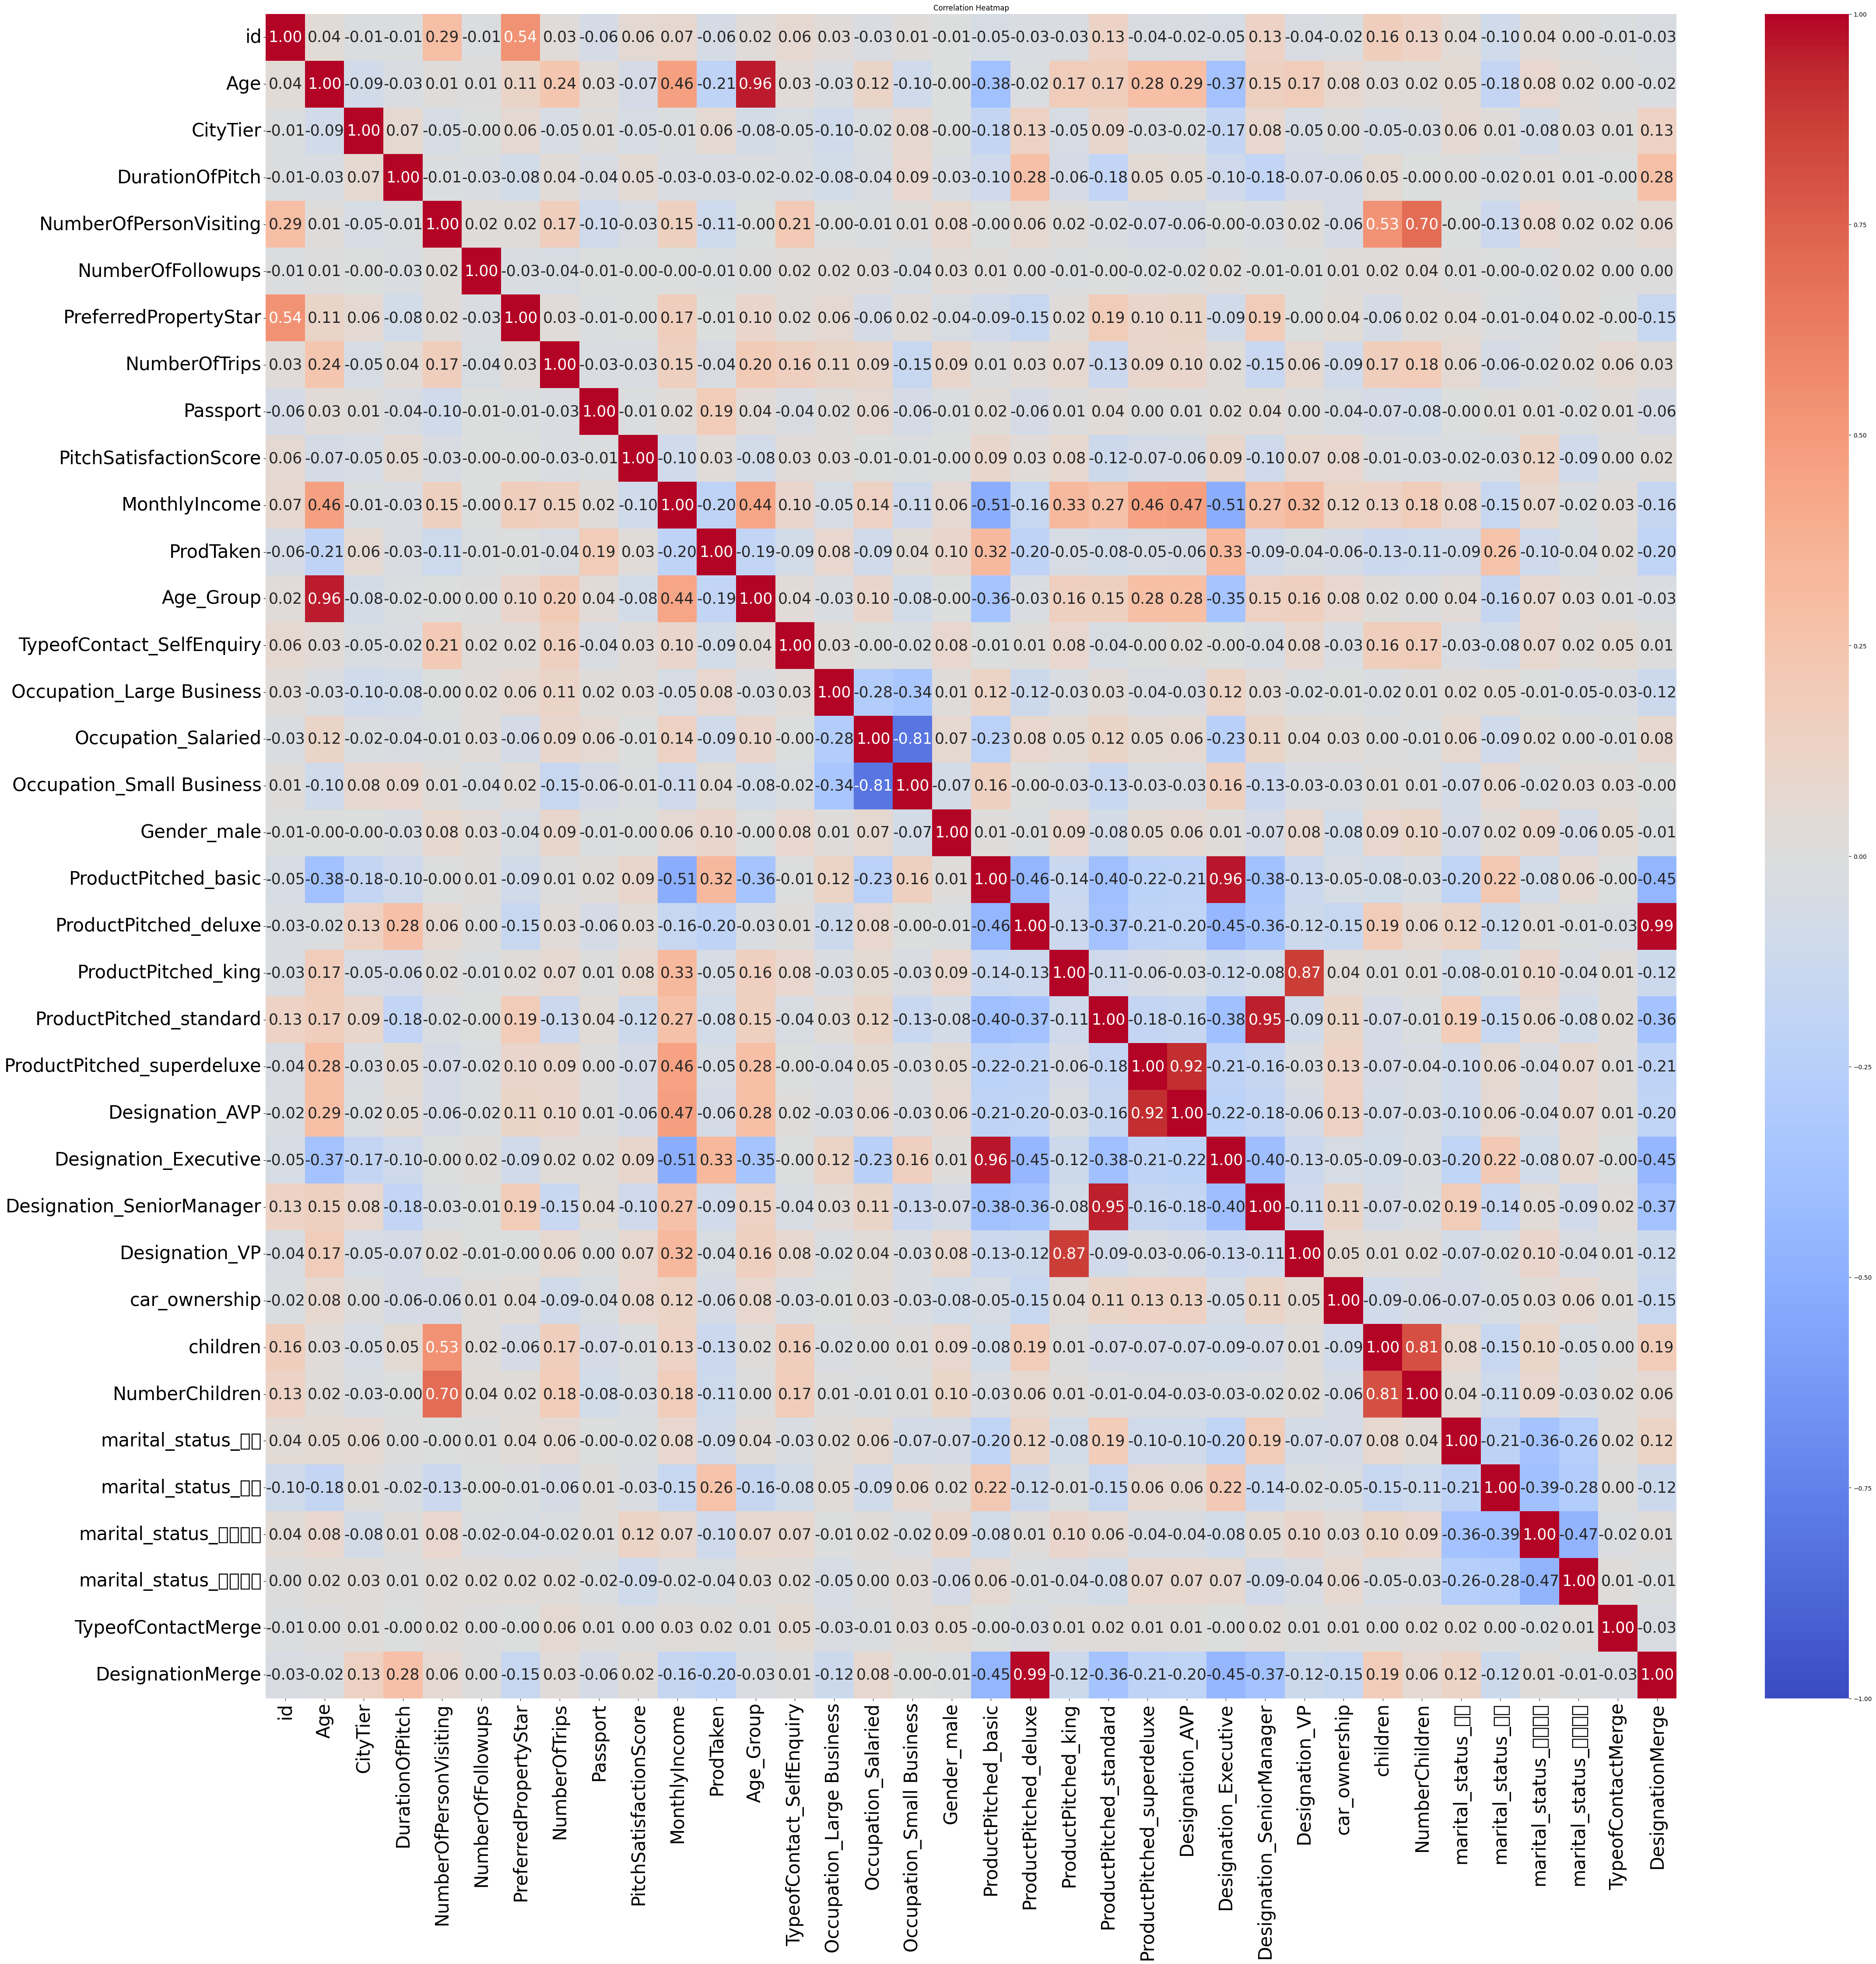

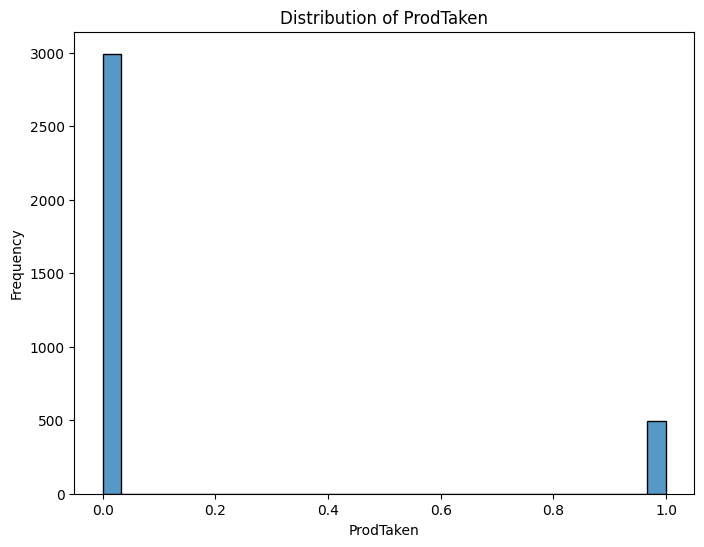

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Âü∫Êú¨Áµ±Ë®àÈáè„ÅÆË°®Á§∫
print("Train DataFrame Basic Statistics:")
display(train_df.describe())

print("\nTest DataFrame Basic Statistics:")
display(test_df.describe())

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÊÉÖÂ†±„ÅÆË°®Á§∫
print("\nTrain DataFrame Info:")
display(train_df.info())

print("\nTest DataFrame Info:")
display(test_df.info())

# Áõ∏Èñ¢Ë°åÂàó„ÅÆË®àÁÆó
correlation_matrix = train_df.corr()

# „Éí„Éº„Éà„Éû„ÉÉ„Éó„ÅÆË°®Á§∫
plt.figure(figsize=(52, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, annot_kws={"size": 25})
plt.title('Correlation Heatmap')
# Ëª∏„É©„Éô„É´„ÅÆ„Çµ„Ç§„Ç∫„ÇíË™øÊï¥
plt.xticks(fontsize=30)  # xËª∏„É©„Éô„É´„ÅÆ„Çµ„Ç§„Ç∫
plt.yticks(fontsize=30)  # yËª∏„É©„Éô„É´„ÅÆ„Çµ„Ç§„Ç∫
plt.show()

# ÁõÆÁöÑÂ§âÊï∞„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„ÅÆË°®Á§∫
plt.figure(figsize=(8, 6))
sns.histplot(train_df['ProdTaken'], kde=False, bins=30)
plt.title('Distribution of ProdTaken')
plt.xlabel('ProdTaken')
plt.ylabel('Frequency')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 360, number of negative: 2152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 2512, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143312 -> initscore=-1.788049
[LightGBM] [Info] Start training from score -1.788049
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 360, number of negative: 2152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23130 (\N{CJK UNIFIED IDEOGRAPH-5A5A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28168 (\N{CJK UNIFIED IDEOGRAPH-6E08}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

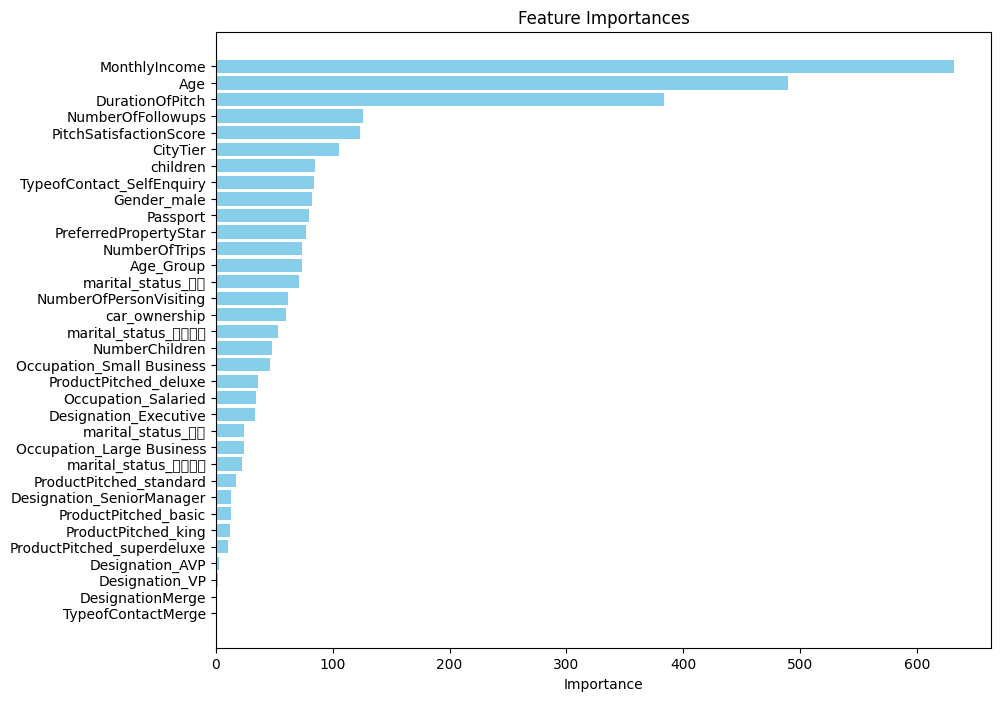

Make_filing_Success!


"\nfrom sklearn.feature_selection import RFE\nfrom sklearn.pipeline import Pipeline\nimport lightgbm as lgb\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.metrics import roc_auc_score\n\n# idÂàó„ÇíÂâäÈô§„Åó„ÄÅÁõÆÁöÑÂ§âÊï∞„ÇíÂèñ„ÇäÂá∫„Åô\nX = train_df.drop(columns=['id', 'ProdTaken'])\ny = train_df['ProdTaken']\n\n# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤\nX_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# LightGBM„ÅÆ„É¢„Éá„É´‰ΩúÊàê\nmodel = lgb.LGBMClassifier(\n    n_estimators=100,     # „Éá„Éï„Ç©„É´„ÉàÂÄ§\n    learning_rate=0.1,    # „Éá„Éï„Ç©„É´„ÉàÂÄ§\n    num_leaves=31,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§\n    max_depth=-1,         # „Éá„Éï„Ç©„É´„ÉàÂÄ§ÔºàÁÑ°Âà∂ÈôêÔºâ\n    subsample=1.0,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§\n    colsample_bytree=1.0, # „Éá„Éï„Ç©„É´„ÉàÂÄ§\n)\n\n# RFE„Çí‰ΩøÁî®„Åó„Å¶ÁâπÂæ¥ÈáèÈÅ∏Êäû\nselector = RFE(model, n_features_to_select=29, step=1)  # n_features_to_

In [10]:

from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# idÂàó„ÇíÂâäÈô§„Åó„ÄÅÁõÆÁöÑÂ§âÊï∞„ÇíÂèñ„ÇäÂá∫„Åô
X = train_df.drop(columns=['id', 'ProdTaken'])
y = train_df['ProdTaken']

# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

# LightGBM„ÅÆ„É¢„Éá„É´‰ΩúÊàê
model = lgb.LGBMClassifier(
    n_estimators=100,     # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    learning_rate=0.1,    # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    num_leaves=31,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    max_depth=-1,         # „Éá„Éï„Ç©„É´„ÉàÂÄ§ÔºàÁÑ°Âà∂ÈôêÔºâ
    subsample=1.0,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    colsample_bytree=1.0, # „Éá„Éï„Ç©„É´„ÉàÂÄ§
)

# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßAUC„ÇíË©ï‰æ°
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print(f'„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅÆAUC„Çπ„Ç≥„Ç¢: {cv_scores.mean():.4f}')

# „É¢„Éá„É´„ÅÆË®ìÁ∑¥
model.fit(X_train, y_train)

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíË°®Á§∫
importance = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Çí„Éí„Çπ„Éà„Ç∞„É©„É†„ÅßË°®Á§∫
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # ÈôçÈ†Ü„Å´Ë°®Á§∫
plt.show()

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨
# ÁõÆÁöÑÂ§âÊï∞„Åå„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´„ÅØÂê´„Åæ„Çå„Å¶„ÅÑ„Å™„ÅÑ„Åü„ÇÅ„ÄÅ‰∫àÊ∏¨„ÇíË°å„ÅÜ
test_features = test_df.drop(columns=['id', 'ProdTaken'])
probabilities = model.predict_proba(test_features)

# ID„Å®‰∫àÊ∏¨Á¢∫Áéá„ÅÆDataFrame„Çí‰ΩúÊàê
output = pd.DataFrame({
    'id': test_df['id'],
    'probability': probabilities[:, 1]  # „ÇØ„É©„Çπ1„ÅÆÁ¢∫Áéá
})

# CSV„Éï„Ç°„Ç§„É´„Å®„Åó„Å¶‰øùÂ≠òÔºà„Éò„ÉÉ„ÉÄ„ÉºÁÑ°„ÅóÔºâ
output.to_csv('SignateCup2024.csv', index=False, header=False)
print('Make_filing_Success!')

'''
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

# idÂàó„ÇíÂâäÈô§„Åó„ÄÅÁõÆÁöÑÂ§âÊï∞„ÇíÂèñ„ÇäÂá∫„Åô
X = train_df.drop(columns=['id', 'ProdTaken'])
y = train_df['ProdTaken']

# „Éá„Éº„Çø„ÅÆÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

# LightGBM„ÅÆ„É¢„Éá„É´‰ΩúÊàê
model = lgb.LGBMClassifier(
    n_estimators=100,     # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    learning_rate=0.1,    # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    num_leaves=31,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    max_depth=-1,         # „Éá„Éï„Ç©„É´„ÉàÂÄ§ÔºàÁÑ°Âà∂ÈôêÔºâ
    subsample=1.0,        # „Éá„Éï„Ç©„É´„ÉàÂÄ§
    colsample_bytree=1.0, # „Éá„Éï„Ç©„É´„ÉàÂÄ§
)

# RFE„Çí‰ΩøÁî®„Åó„Å¶ÁâπÂæ¥ÈáèÈÅ∏Êäû
selector = RFE(model, n_features_to_select=29, step=1)  # n_features_to_select„ÅØÈÅ∏Êäû„Åó„Åü„ÅÑÁâπÂæ¥ÈáèÊï∞
selector = selector.fit(X_train, y_train)

# ÈÅ∏Êäû„Åï„Çå„ÅüÁâπÂæ¥Èáè
selected_features = X_train.columns[selector.support_]

# LightGBM„É¢„Éá„É´„ÇíRFE„ÅßÈÅ∏Êäû„Åó„ÅüÁâπÂæ¥Èáè„ÅÆ„Åø„ÅßÂÜçË®ìÁ∑¥
model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    subsample=1.0,
    colsample_bytree=1.0,
)

# Ë®ìÁ∑¥„Éá„Éº„Çø„Å®Ê§úË®º„Éá„Éº„Çø„ÇíÈÅ∏Êäû„Åï„Çå„ÅüÁâπÂæ¥Èáè„Åß„Éï„Ç£„É´„Çø„É™„É≥„Ç∞
X_train_selected = X_train[selected_features]
X_valid_selected = X_valid[selected_features]

# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßAUC„ÇíË©ï‰æ°
cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='roc_auc')
print(f'„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅÆAUC„Çπ„Ç≥„Ç¢: {cv_scores.mean():.4f}')

# „É¢„Éá„É´„ÅÆË®ìÁ∑¥
model.fit(X_train_selected, y_train)

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíË°®Á§∫
importance = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Çí„Éí„Çπ„Éà„Ç∞„É©„É†„ÅßË°®Á§∫
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # ÈôçÈ†Ü„Å´Ë°®Á§∫
plt.show()

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨
test_features = test_df.drop(columns=['id', 'ProdTaken'])
test_features_selected = test_features[selected_features]
probabilities = model.predict_proba(test_features_selected)

# ID„Å®‰∫àÊ∏¨Á¢∫Áéá„ÅÆDataFrame„Çí‰ΩúÊàê
output = pd.DataFrame({
    'id': test_df['id'],
    'probability': probabilities[:, 1]  # „ÇØ„É©„Çπ1„ÅÆÁ¢∫Áéá
})

# CSV„Éï„Ç°„Ç§„É´„Å®„Åó„Å¶‰øùÂ≠òÔºà„Éò„ÉÉ„ÉÄ„ÉºÁÑ°„ÅóÔºâ
output.to_csv('SignateCup2024.csv', index=False, header=False)
print('Make_filing_Success!')
'''